In [140]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
import pandas as pd
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)

2.4.1


In [141]:
features = pd.read_csv('temps.csv')
features.head()

,year,month,day,week,temp_2,temp_1,average,actual,friend
0,2016,1,1,Fri,45,45,45.6,45,29
1,2016,1,2,Sat,44,45,45.7,44,61
2,2016,1,3,Sun,45,44,45.8,41,56
3,2016,1,4,Mon,44,41,45.9,40,53
4,2016,1,5,Tues,41,40,46.0,44,41


In [142]:
temp_1 = features.loc[:, 'temp_1']
temp_2 = features.loc[:, 'temp_2']
actual = features.loc[:, 'actual']
friend = features.loc[:, 'friend']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb1583d8c90>,
      dtype=object)

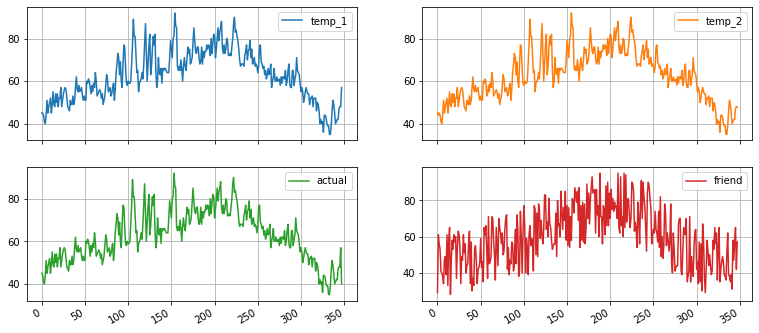

In [143]:
dfs = pd.concat([temp_1, temp_2, actual, friend], axis=1)
dfs.plot(subplots=True, grid=True, figsize=(13, 6), layout=(2, 2))

In [144]:
features.drop(columns='week', inplace=True)

In [145]:
features

,year,month,day,temp_2,temp_1,average,actual,friend
0,2016,1,1,45,45,45.6,45,29
1,2016,1,2,44,45,45.7,44,61
2,2016,1,3,45,44,45.8,41,56
3,2016,1,4,44,41,45.9,40,53
4,2016,1,5,41,40,46.0,44,41
...,...,...,...,...,...,...,...,...
343,2016,12,27,42,42,45.2,47,47
344,2016,12,28,42,47,45.3,48,58
345,2016,12,29,47,48,45.3,48,65
346,2016,12,30,48,48,45.4,57,42


In [146]:
y_labels = np.array(features['actual'])
y_labels.shape

(348,)

In [147]:
x_input = np.array(features.drop(columns='actual'))
x_input.shape

(348, 7)

In [148]:
x_scaled_input = preprocessing.StandardScaler().fit_transform(x_input)

In [149]:
model = keras.Sequential()
model.add(keras.layers.Dense(16,
kernel_initializer=keras.initializers.random_normal,
kernel_regularizer=keras.regularizers.l2(0.03)))
model.add(keras.layers.Dense(32,
kernel_initializer=keras.initializers.random_normal,
kernel_regularizer=keras.regularizers.l2(0.03)))
model.add(keras.layers.Dense(1,
kernel_initializer=keras.initializers.random_normal,
kernel_regularizer=keras.regularizers.l2(0.03)))

In [150]:
model.compile(optimizer=keras.optimizers.SGD(0.001), loss='mean_squared_error')

In [151]:
history = model.fit(x=x_scaled_input, y=y_labels, validation_split=0.25, epochs=100, batch_size=64)

Epoch 1/100
5/5 [==============================] - 0s 35ms/step - loss: 4385.1890 - val_loss: 2869.2068
Epoch 2/100
5/5 [==============================] - 0s 10ms/step - loss: 4331.4180 - val_loss: 2789.7844
Epoch 3/100
5/5 [==============================] - 0s 10ms/step - loss: 4208.1266 - val_loss: 2679.5303
Epoch 4/100
5/5 [==============================] - 0s 10ms/step - loss: 3962.6348 - val_loss: 2498.4299
Epoch 5/100
5/5 [==============================] - 0s 10ms/step - loss: 3135.0421 - val_loss: 3183.6411
Epoch 6/100
5/5 [==============================] - 0s 10ms/step - loss: 220.5416 - val_loss: 1558.0593
Epoch 7/100
5/5 [==============================] - 0s 10ms/step - loss: 83.3436 - val_loss: 849.8289
Epoch 8/100
5/5 [==============================] - 0s 10ms/step - loss: 68.0483 - val_loss: 823.4528
Epoch 9/100
5/5 [==============================] - 0s 10ms/step - loss: 54.0245 - val_loss: 611.9440
Epoch 10/100
5/5 [==============================] - 0s 10ms/step - loss: 3

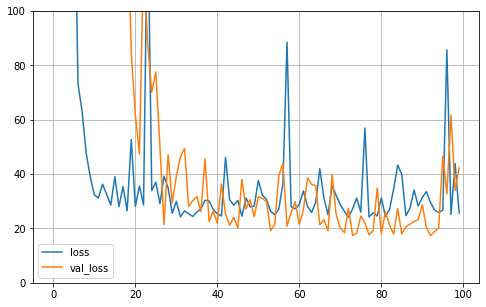

In [152]:
pd.DataFrame(history.history).plot(figsize=(8, 5), grid=True, ylim=(0, 100))

In [153]:
predict = model.predict(x_scaled_input)

In [154]:
date = features['year'].astype('str') + '/' + features['month'].astype('str') + '/' + features['day'].astype('str')

dfs = pd.DataFrame({'date': date, 'predict': predict.reshape(-1), 'actual': actual}).set_index('date')

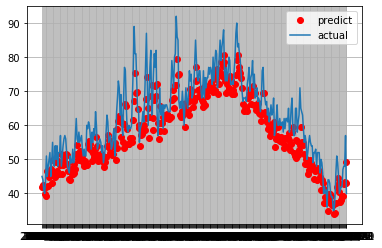

In [155]:
plt.plot(dfs.index, dfs['predict'], 'ro', label='predict')
plt.plot(dfs.index, dfs['actual'], label='actual')
plt.grid(True)
plt.legend()